In [109]:
import torch
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm 

import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader 
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [110]:
batch_size = 60

# Définition des transformations (ToTensor + Normalisation)
transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.1307,), std=(0.3081,))
])

train_dataset = datasets.MNIST(
    root="dataset/", 
    download=True, 
    train=True, 
    transform=transformations
)

train_loader = DataLoader(
    dataset=train_dataset, 
    batch_size=batch_size, 
    shuffle=True
)

test_dataset = datasets.MNIST(
    root="dataset/", 
    download=True, 
    train=False, 
    transform=transformations
)

test_loader = DataLoader(
    dataset=test_dataset, 
    batch_size=batch_size, 
    shuffle=True
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.42421296..2.8214867].


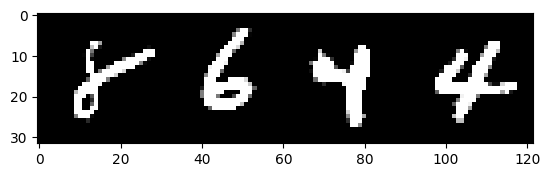

Étiquettes: tensor([8, 6, 4, 4])


In [111]:
import torchvision


def imshow(img):
   npimg = img.numpy()
   plt.imshow(np.transpose(npimg, (1, 2, 0)))
   plt.show()

dataiter = iter(train_loader) 
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:4])) 

print('Étiquettes:', labels[:4])

In [ ]:
class CNN(nn.Module):
    def __init__(self, in_channels, num_classes):
        """
        Blocs de construction du réseau neuronal convolutif.
        
        Paramètres:
            * in_channels: Nombre de canaux dans l'image d'entrée (1 pour niveaux de gris)
            * num_classes: Nombre de classes à prédire (10 pour 0 à 9)
        """
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=8, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(8)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(16)
        
        self.fc1 = nn.Sequential(
            nn.Linear(16 * 7 * 7, 128),  
            nn.ReLU(),
            nn.Dropout(p=0.3),            
            nn.Linear(128, num_classes) 
        )

    def forward(self, x):
        """
        Définit le passage avant (forward pass) du réseau.
        """
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        
        x = x.reshape(x.shape[0], -1) 
        
        x = self.fc1(x)             
        return x

In [ ]:
from torch.utils.tensorboard import SummaryWriter

device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN(in_channels=1, num_classes=10).to(device)

writer = SummaryWriter(f'runs/mnist_cnn_model')

print(model)

print(f"Entrées de la couche linéaire: {model.fc1[0].in_features}")

CNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)
Entrées de la couche linéaire: 784


In [114]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [115]:
num_epochs = 10
step = 0

for epoch in range(num_epochs):
   print(f"Epoch [{epoch + 1}/{num_epochs}]")

   for batch_index, (data, targets) in enumerate(tqdm(train_loader)):
       
       data = data.to(device)
       targets = targets.to(device)
       
       scores = model(data)
       
       loss = criterion(scores, targets)
       
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()

       writer.add_scalar('Perte/Training Batch', loss.item(), global_step=step)
       step += 1

writer.close()

Epoch [1/10]


100%|██████████| 1000/1000 [00:16<00:00, 59.50it/s]


Epoch [2/10]


100%|██████████| 1000/1000 [00:16<00:00, 62.20it/s]


Epoch [3/10]


100%|██████████| 1000/1000 [00:16<00:00, 61.80it/s]


Epoch [4/10]


100%|██████████| 1000/1000 [00:16<00:00, 61.00it/s]


Epoch [5/10]


100%|██████████| 1000/1000 [00:16<00:00, 61.91it/s]


Epoch [6/10]


100%|██████████| 1000/1000 [00:16<00:00, 61.80it/s]


Epoch [7/10]


100%|██████████| 1000/1000 [00:16<00:00, 62.09it/s]


Epoch [8/10]


100%|██████████| 1000/1000 [00:16<00:00, 60.99it/s]


Epoch [9/10]


100%|██████████| 1000/1000 [00:16<00:00, 61.64it/s]


Epoch [10/10]


100%|██████████| 1000/1000 [00:16<00:00, 61.53it/s]


In [116]:
w = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

# input
x = torch.tensor([3.0])

In [117]:
# Forward pass
y_pred = w * x + b
print(f"y_pred: {y_pred.item()}")

y_pred: 7.0


In [118]:
# Loss
y_true = torch.tensor([10.0])
loss = (y_pred - y_true) ** 2
print(f"Loss: {loss.item()}")

Loss: 9.0


In [119]:
print(f"Avant backward: w.grad = {w.grad}")

Avant backward: w.grad = None


In [120]:
loss.backward()

In [121]:
print(f"Apres backward: w.grad= {w.grad}")
print(f"Apres backward: b.grad= {b.grad}")

Apres backward: w.grad= tensor([-18.])
Apres backward: b.grad= tensor([-6.])


In [122]:
learning_rate = 0.01
with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad

In [123]:
print(f"Nouveau poids: w = {w}, b = {b}")

Nouveau poids: w = tensor([2.1800], requires_grad=True), b = tensor([1.0600], requires_grad=True)


In [124]:
w.grad.zero_()
b.grad.zero_()
print(f"Apres zero_: w.grad = {w.grad}, b.grad = {b.grad}")

Apres zero_: w.grad = tensor([0.]), b.grad = tensor([0.])


In [125]:
import torch.nn as nn
perceptron = nn.Linear(1, 1)

#voir les poids initiaux
print(f"Poids: {perceptron.weight}")
print(f"Biais: {perceptron.bias}")

Poids: Parameter containing:
tensor([[-0.6602]], requires_grad=True)
Biais: Parameter containing:
tensor([0.2700], requires_grad=True)


In [ ]:
# forward
x = torch.tensor([[3.0]]) 
print(f"input: {x}")
y_pred = perceptron(x)
print(y_pred)

input: tensor([[3.]])
tensor([[-1.7107]], grad_fn=<AddmmBackward0>)


In [127]:
# Loss
y_true = torch.tensor([[10.0]])
criterion = nn.MSELoss()
loss = criterion(y_pred, y_true)

In [128]:
loss.backward()

In [129]:
print(f"Gradient du poids: {perceptron.weight.grad}")
print(f"Gradient du biais: {perceptron.bias.grad}")

Gradient du poids: tensor([[-70.2640]])
Gradient du biais: tensor([-23.4213])


In [130]:
import torch.optim as optim
optimizer = optim.SGD(perceptron.parameters(), lr=0.01)

In [131]:
optimizer.step()

In [132]:
print(f"Nouveau poids: {perceptron.weight} {perceptron.bias}")

Nouveau poids: Parameter containing:
tensor([[0.0424]], requires_grad=True) Parameter containing:
tensor([0.5042], requires_grad=True)


In [133]:
optimizer.zero_grad()

In [134]:
print(f"Gradient du poids: {perceptron.weight.grad}")
print(f"Gradient du biais: {perceptron.bias.grad}")

Gradient du poids: None
Gradient du biais: None


In [135]:
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 3)
        self.fc3 = nn.Linear(3, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [136]:
model = SimpleNet()

In [137]:
model

SimpleNet(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [138]:
x = torch.tensor([1.0, 2.0])
y = torch.tensor([5.0])
y_pred = model(x)
loss = nn.MSELoss()(y_pred,y)

loss.backward()

In [139]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Compose, Normalize
import matplotlib.pylab as plt

In [140]:
training_data = datasets.MNIST(
    root="data",
    train= True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.MNIST(
    root="data",
    train = False,
    download=True,
    transform=ToTensor()
)

In [141]:
training_dataloader = DataLoader (training_data, batch_size=64, shuffle=True, pin_memory= True, num_workers=4)
test_dataloader = DataLoader(test_data, batch_size= 64, shuffle=False, pin_memory=True, num_workers=4)

In [142]:
print(training_data.classes)
print(training_data.data.size())

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
torch.Size([60000, 28, 28])


In [143]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), 
            
            nn.Conv2d(10, 20, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.mlp_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(320, 50),
            nn.ReLU(),
            # Dropout 
            nn.Dropout(p=0.3), 
            nn.Linear(50, 10) 
        )

    def forward(self, x):
        x = self.conv_layers(x)
        logits = self.mlp_layers(x)
        return logits

In [144]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
model = NeuralNetwork().to(device)


In [145]:
X = torch.rand(1, 1, 28, 28, device = device)
logits = model(X)

In [146]:
logits

tensor([[ 0.0167,  0.1156, -0.0514,  0.0622,  0.0954,  0.1431,  0.0578,  0.2197,
          0.0325,  0.0933]], grad_fn=<AddmmBackward0>)

In [147]:
pred_probab = nn.Softmax(dim=1)(logits)
pred_probab

tensor([[0.0938, 0.1035, 0.0876, 0.0981, 0.1015, 0.1064, 0.0977, 0.1149, 0.0953,
         0.1012]], grad_fn=<SoftmaxBackward0>)

In [148]:
y_pred = pred_probab.argmax(1)
y_pred

tensor([7])

In [149]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

In [150]:
def train(dataloader, model, loss_fn, optimizer): 
    size = len(dataloader.dataset)
    model.train()
    for batch_idx, batch_value in enumerate(dataloader):
        X, y = batch_value
        X, y = X.to(device), y.to(device)

        # forward pass
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch_idx % 100 == 0:
            loss, current = loss.item(), (batch_idx+1) * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5}]")

In [151]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss+= loss_fn(pred, y).item()
            correct+= (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss/=num_batches
    correct/=size
    print(f"Test Error: \n Accuracy: {(100*correct):0.1f}%, Avg loss: {test_loss:>8f}\n")

In [152]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n---------------------")
    train(training_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")


Epoch 1
---------------------


c:\4eme-année\MachineLearning\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


loss: 2.327324 [   64/60000]
loss: 0.837227 [ 6464/60000]
loss: 0.399187 [12864/60000]
loss: 0.489850 [19264/60000]
loss: 0.326583 [25664/60000]
loss: 0.329485 [32064/60000]
loss: 0.311802 [38464/60000]
loss: 0.239616 [44864/60000]
loss: 0.445962 [51264/60000]
loss: 0.181706 [57664/60000]
Test Error: 
 Accuracy: 96.9%, Avg loss: 0.098775

Epoch 2
---------------------
loss: 0.092950 [   64/60000]
loss: 0.240127 [ 6464/60000]
loss: 0.076383 [12864/60000]
loss: 0.167721 [19264/60000]
loss: 0.274298 [25664/60000]
loss: 0.088617 [32064/60000]
loss: 0.248892 [38464/60000]
loss: 0.110343 [44864/60000]
loss: 0.085166 [51264/60000]
loss: 0.074643 [57664/60000]
Test Error: 
 Accuracy: 98.2%, Avg loss: 0.061761

Epoch 3
---------------------
loss: 0.060579 [   64/60000]
loss: 0.026754 [ 6464/60000]
loss: 0.156763 [12864/60000]
loss: 0.128559 [19264/60000]
loss: 0.052504 [25664/60000]
loss: 0.152610 [32064/60000]
loss: 0.169982 [38464/60000]
loss: 0.049207 [44864/60000]
loss: 0.130016 [51264/6000

In [ ]:
example_inputs = (torch.rand(1, 1, 28, 28,),)
model.to("cpu")
onnx_path = torch.onnx.export(model, example_inputs, dynamo=True)
onnx_path.save("model.onnx")

[torch.onnx] Obtain model graph for `NeuralNetwork([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `NeuralNetwork([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅
